In [1]:
from Lab_Analyses.Spine_Analysis_v2.isosbestic_volume_comparison import isosbestic_volume_comparison

%matplotlib notebook

In [2]:
mouse_list = ["JW206", "JW213", "JW215", "JW241"]

In [3]:
save_path = r"C:\Users\Jake\Desktop\Figures\Elimination_Paper\python_plots"

Number of spine: 682


<IPython.core.display.Javascript object>


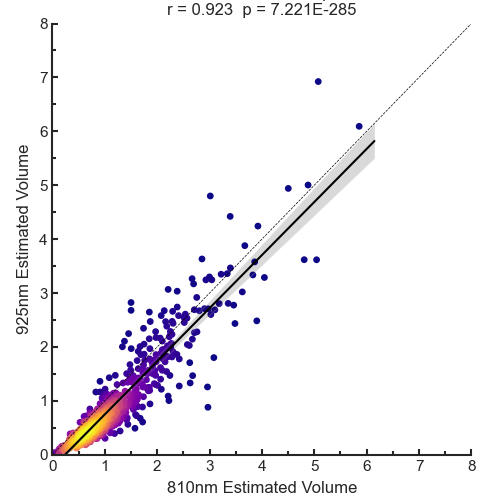

In [4]:
isosbestic_volume_comparison(mouse_list, False, save_path)

In [ ]:
# Compare volume with and without activity
from Lab_Analyses.Spine_Analysis_v2.spine_utilities import load_spine_datasets
from Lab_Analyses.Spine_Analysis_v2.structural_plasticity import calculate_volume_change
import numpy as np

mouse_list = ["JW083", "JW090", "JW092", "JW129", "JW130", "JW153", "JW168"]

mouse_uncorrected_volumes =[]
mouse_corrected_volumes = []
mouse_uncorrected_relative_vols = []
mouse_corrected_relative_vols = []
for mouse in mouse_list:
    dataset = load_spine_datasets(mouse, days=["Early", "Middle", "Late"], fov_type="apical")
    for FOV, data in dataset.items():
        for day, value in data.items():
            # Volumes
            pix_to_um = value.imaging_parameters["Zoom"] / 2
            spine_volume = (np.sqrt(value.spine_volume) / pix_to_um) **2
            corrected_spine_volume = (np.sqrt(value.corrected_spine_volume) / pix_to_um) **2
            mouse_uncorrected_volumes.append(spine_volume)
            mouse_corrected_volumes.append(corrected_spine_volume)
            # Relative volumes
            uncorrected_flags = value.spine_flags
            uncorrected_followup_flags = value.followup_flags
            uncorrected_followup_volume = value.followup_volume
            uncorrected_followup_volume = (np.sqrt(uncorrected_followup_volume) / pix_to_um) **2
            uncorrected_vol_list = [spine_volume, uncorrected_followup_volume]
            uncorrected_flag_list = [uncorrected_flags, uncorrected_followup_flags]
            uncorrected_relative_volume, _ = calculate_volume_change(uncorrected_vol_list, uncorrected_flag_list, exclude="Shaft Spine")
            mouse_uncorrected_relative_vols.append(uncorrected_relative_volume[-1])
            
            corrected_flags = value.spine_flags
            corrected_followup_flags = value.followup_flags
            corrected_followup_volume = value.corrected_followup_volume
            corrected_followup_volume = (np.sqrt(corrected_followup_volume) / pix_to_um) **2
            corrected_vol_list = [corrected_spine_volume, corrected_followup_volume]
            corrected_flag_list = [corrected_flags, corrected_followup_flags]
            corrected_relative_volume, _ = calculate_volume_change(corrected_vol_list, corrected_flag_list, exclude="Shaft Spine")
            mouse_corrected_relative_vols.append(corrected_relative_volume[-1])

In [ ]:
mouse_uncorrected_volumes = np.concatenate(mouse_uncorrected_volumes)
mouse_corrected_volumes = np.concatenate(mouse_corrected_volumes)
mouse_corrected_relative_vols = np.concatenate(mouse_corrected_relative_vols)
mouse_uncorrected_relative_vols = np.concatenate(mouse_uncorrected_relative_vols)

In [ ]:
from Lab_Analyses.Plotting.plot_scatter_correlation import plot_scatter_correlation
print(len(mouse_uncorrected_volumes))
plot_scatter_correlation(
    mouse_uncorrected_volumes,
    mouse_corrected_volumes,
    CI=95,
    title="Activity corrected volumes",
    xtitle="Uncorrected Estimated Volume",
    ytitle="Corrected Estimated Volume",
    figsize=(5, 5),
    xlim=(0, 8),
    ylim=(0, 8),
    marker_size=15,
    face_color="cmap",
    edge_color="black",
    edge_width=0.0,
    line_color="black",
    s_alpha=0.2,
    line_width=1.5,
    axis_width=1.5,
    minor_ticks="both",
    tick_len=4,
    unity=True,
    ax=None,
    save=True,
    save_path=save_path,
)

In [ ]:
print(len(mouse_uncorrected_relative_vols))
plot_scatter_correlation(
    mouse_uncorrected_relative_vols,
    mouse_corrected_relative_vols,
    CI=95,
    title="Activity corrected relative volumes",
    xtitle="Uncorrected Relative Volume",
    ytitle="Corrected Relative Volume",
    figsize=(5, 5),
    xlim=(0, 6),
    ylim=(0, 6),
    marker_size=15,
    face_color="cmap",
    edge_color="black",
    edge_width=0.0,
    line_color="black",
    s_alpha=0.2,
    line_width=1.5,
    axis_width=1.5,
    minor_ticks="both",
    tick_len=4,
    unity=True,
    ax=None,
    save=True,
    save_path=save_path,
)